# Bedmap2 Grids
**Description:**  Gridded data in EPSG 3031 projection. Topographic layers, uncertainties, and masks.

**Dataset:** 

N.A. 

**Associated paper:** 

Fretwell, P., H. D. Pritchard, D. G. Vaughan, J. L. Bamber, N. E. Barrand, R. E. Bell, C. Bianchi, et al. “Bedmap2: Improved Ice Bed, Surface and Thickness Datasets for Antarctica.” The Cryosphere 7, no. 1 (2013): 375–93. https://doi.org/10.5194/tc-7-375-2013.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

import pygmt

from polartoolkit import fetch, maps, regions, utils

In [2]:
layer_names = [
    # topographies
    "surface",
    "icebase",
    "bed",
    # thicknesses
    "thickness",
    "water_thickness",
    # uncertainties
    "grounded_bed_uncertainty",
    "thickness_uncertainty_5km",
    # others
    "coverage",
    "icemask_grounded_and_shelves",
    "rockmask",
    "gl04c_geiod_to_WGS84",
    "lakemask_vostok",
]

grids = []
for name in layer_names:
    data = fetch.bedmap2(
        layer=name,
        # available options
        # reference ("eigen-gl04c" or "ellipsoid")
        # region,
        # spacing,
        # registration ("g" for gridline or "p" for pixel),
        # fill_nans (True or False),
    )
    grids.append(data)
    print(f"Info for {name}")
    _ = utils.get_grid_info(data, print_info=True)
    print("##########")

Info for surface


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 1.0
grid zmax: 4082.0
grid registration: g
##########


Info for icebase


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -2736.0
grid zmax: 3972.0
grid registration: g
##########


Info for bed


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -7054.0
grid zmax: 3972.0
grid registration: g
##########


Info for thickness


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 4621.0
grid registration: g
##########


Info for water_thickness


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -1180.0
grid zmax: 2694.0
grid registration: g
##########


Info for grounded_bed_uncertainty


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 65535.0
grid registration: g
##########


Info for thickness_uncertainty_5km


grid spacing: 5000.0 m
grid region: (-3399000.0, 3401000.0, -3400000.0, 3400000.0)
grid zmin: 0.0
grid zmax: 65535.0
grid registration: g
##########


Info for coverage


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 1.0
grid zmax: 1.0
grid registration: g
##########


Info for icemask_grounded_and_shelves


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 1.0
grid registration: g
##########


Info for rockmask


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: 0.0
grid zmax: 0.0
grid registration: g
##########


Info for gl04c_geiod_to_WGS84


grid spacing: 1000.0 m
grid region: (-3333000.0, 3333000.0, -3333000.0, 3333000.0)
grid zmin: -65.8680496216
grid zmax: 36.6361198425
grid registration: g
##########
Info for lakemask_vostok
grid spacing: 1000.0 m
grid region: (1190000.0, 1470000.0, -402000.0, -291000.0)
grid zmin: 1.0
grid zmax: 1.0
grid registration: g
##########


C:\Users\mattd\polartoolkit\src\polartoolkit\maps.py:1031: UserWarning: Since limits were passed to `cpt_lims`, parameter `robust` is unused.
  cmap, colorbar, cpt_lims = set_cmap(


C:\Users\mattd\polartoolkit\src\polartoolkit\maps.py:1031: UserWarning: Since limits were passed to `cpt_lims`, parameter `robust` is unused.
  cmap, colorbar, cpt_lims = set_cmap(


makecpt [ERROR]: Option T: min >= max


makecpt [ERROR]: Option T: min >= max


makecpt [ERROR]: Option T: min >= max


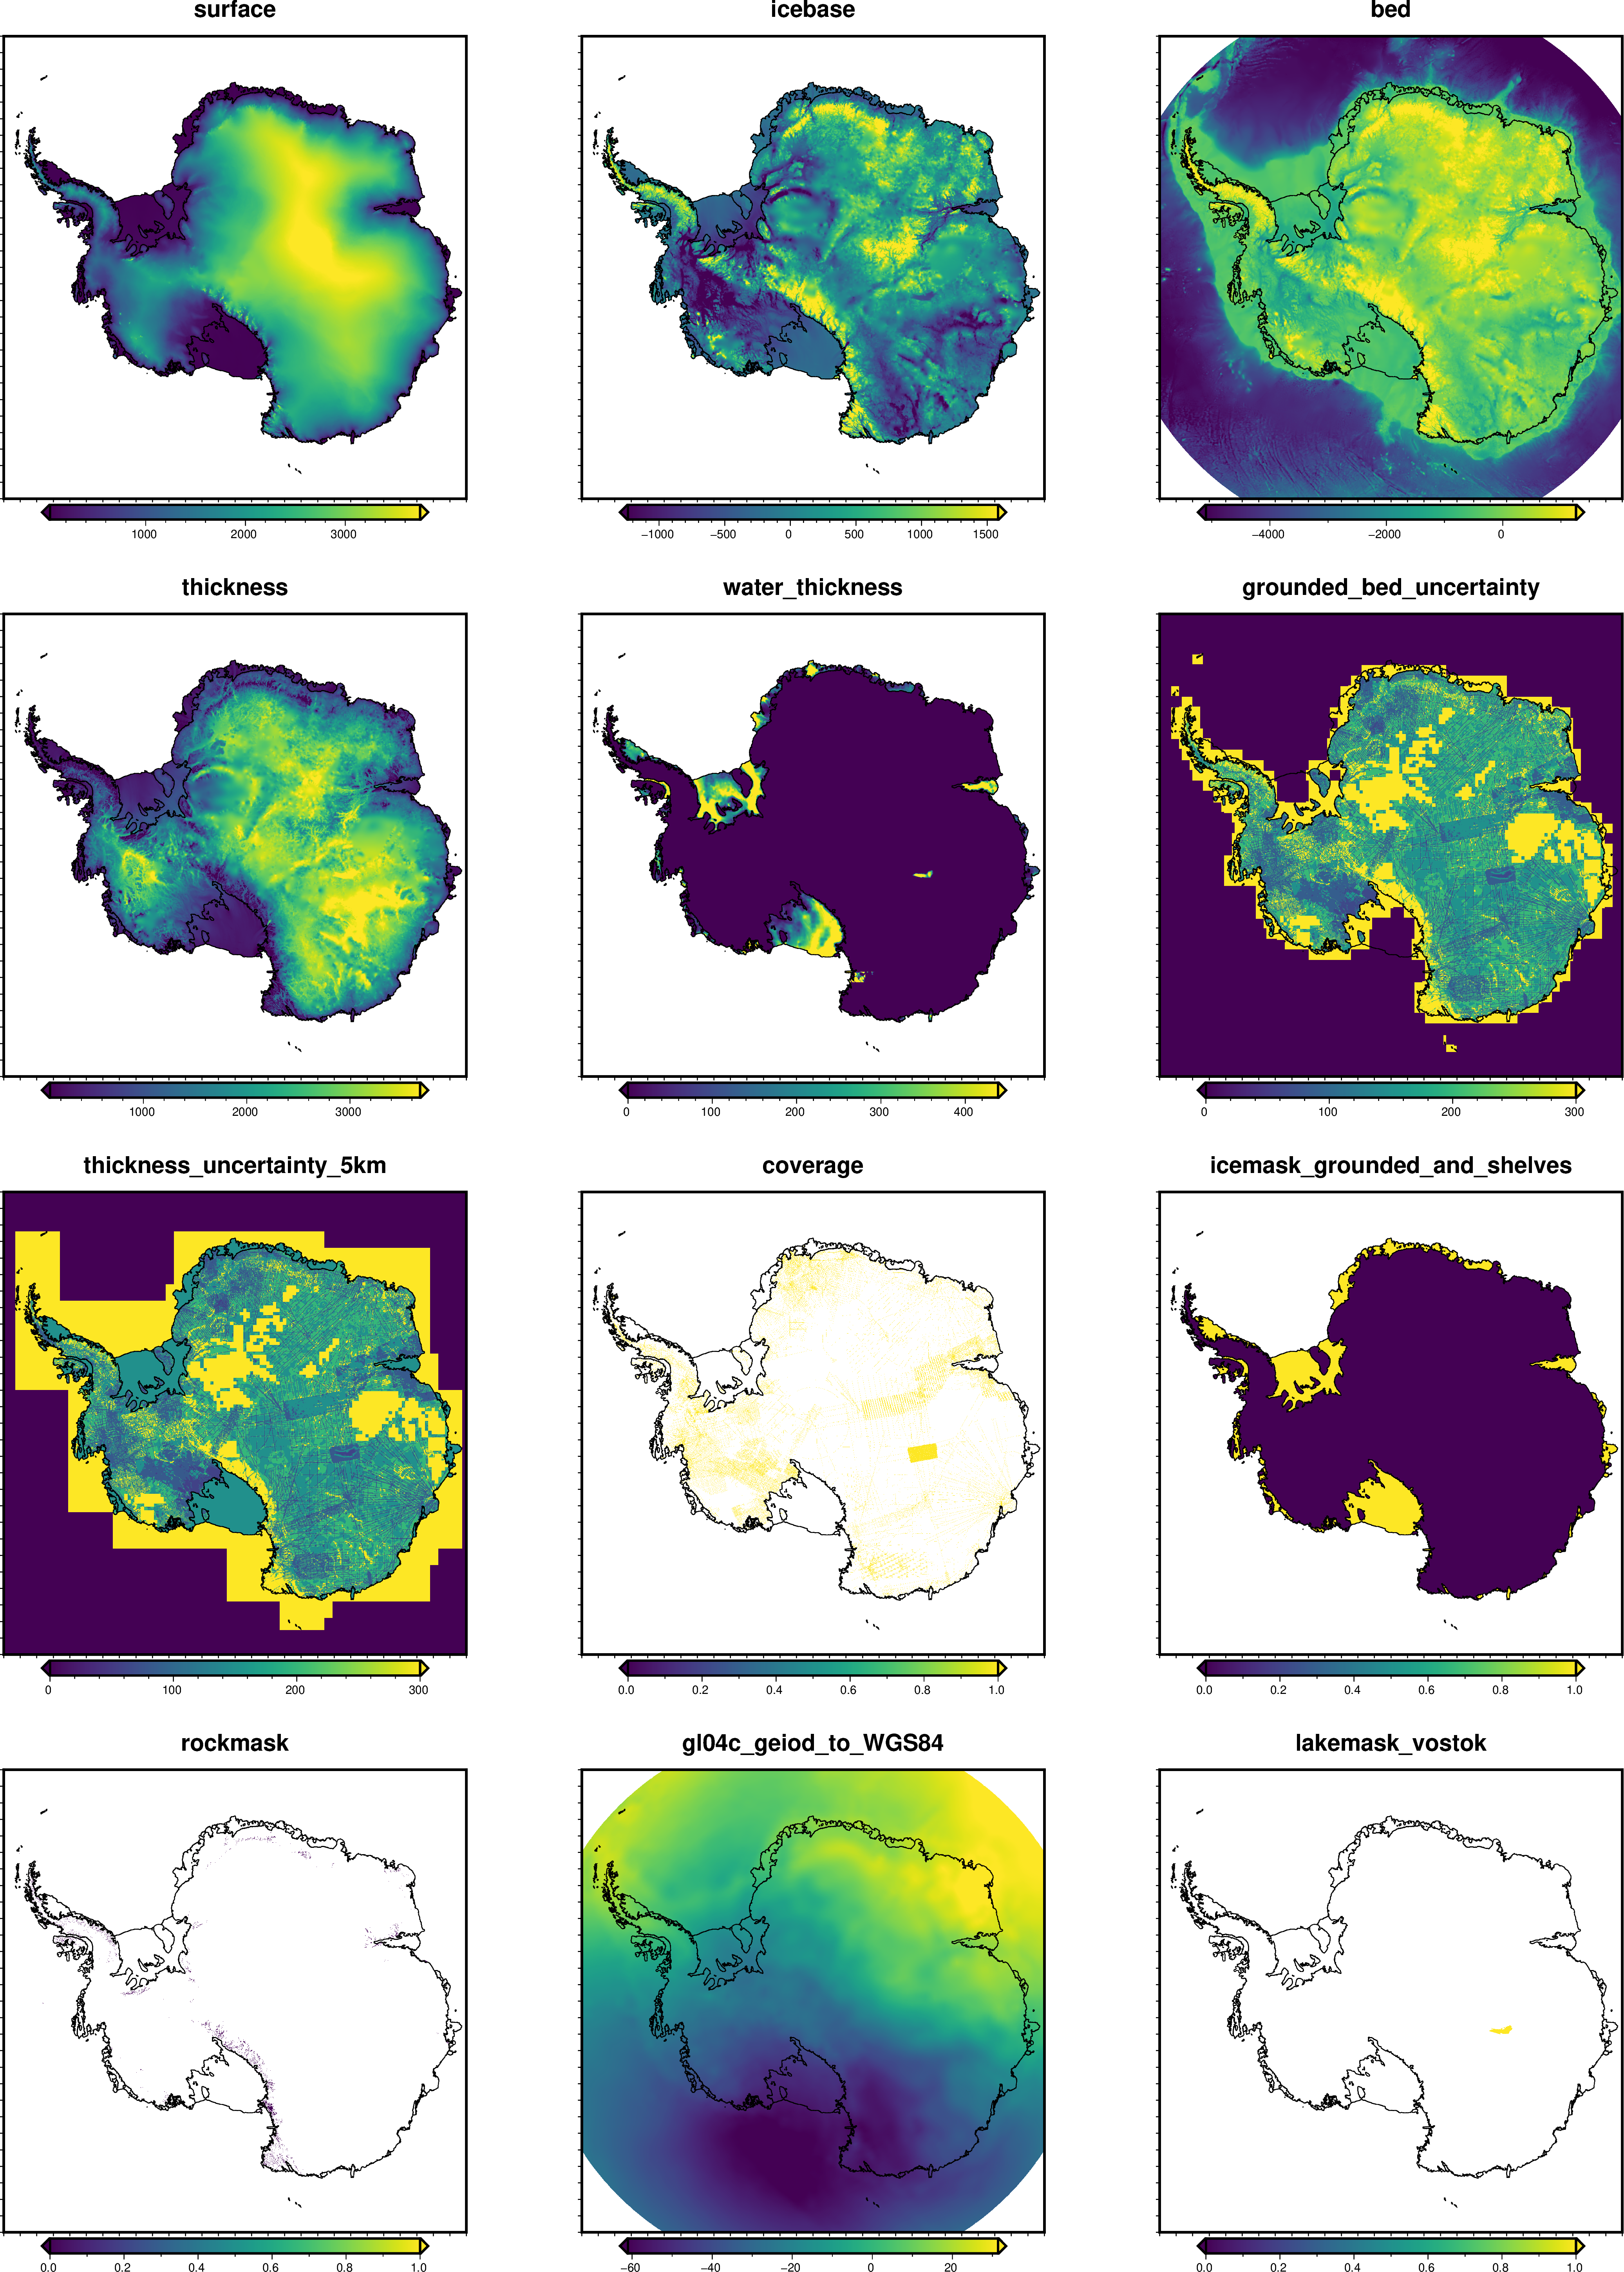

In [3]:
subplot_dimensions = utils.square_subplots(len(layer_names))

region = regions.antarctica
_, _, fig_width, fig_height = utils.set_proj(
    region,
    hemisphere="south",
    fig_height=15,
)

fig = pygmt.Figure()

with fig.subplot(
    nrows=subplot_dimensions[0],
    ncols=subplot_dimensions[1],
    subsize=(fig_width, fig_height),
    frame="f",
    margins="1.5c",
):
    for i, (layer, grid) in enumerate(zip(layer_names, grids)):
        with fig.set_panel(panel=i):
            # plot the grids
            cpt_lims = [0, 300] if "uncertainty" in layer else None
            maps.plot_grd(
                grid,
                fig=fig,
                title=layer,
                origin_shift=None,
                region=region,
                coast=True,
                cpt_lims=cpt_lims,
                robust=True,
                hemisphere="south",
            )
fig.show(dpi=200)